# Plotting selected points and results from algorithm
### Collecting data

In [1]:
from data_splitter import DataSplitter

# # Split rviz selected data
ground_truth_name = "pass1_brakujace.yaml"
splitter = DataSplitter("./data", ground_truth_name)
splitter.split_rviz_selection_data()
splitter.merge_features_into_csv()



Looking for files at ./data/pass1_brakujace_split/1626350369_131931000/features
Looking for files at ./data/pass1_brakujace_split/1626350373_569710000/features
Looking for files at ./data/pass1_brakujace_split/1626350371_754267000/features
Looking for files at ./data/pass1_brakujace_split/1626350372_661983000/features
Looking for files at ./data/pass1_brakujace_split/1626350371_451668000/features
Looking for files at ./data/pass1_brakujace_split/1626350368_22476000/features
Looking for files at ./data/pass1_brakujace_split/1626350371_48239000/features
Looking for files at ./data/pass1_brakujace_split/1626350373_468860000/features
Looking for files at ./data/pass1_brakujace_split/1626350370_342254000/features
Looking for files at ./data/pass1_brakujace_split/1626350368_627686000/features
Looking for files at ./data/pass1_brakujace_split/1626350373_670721000/features
Looking for files at ./data/pass1_brakujace_split/1626350373_771488000/features
Looking for files at ./data/pass1_brakujac

### Load algorithm data

In [5]:
from data_splitter import DataSplitter
test_alg_name = "pass1_alg"
algorithm_splitter = DataSplitter("./data", test_alg_name)
algorithm_splitter.split_node_data()
# algorithm_splitter.merge_features_into_csv()


### Load Algorithm data and selected points


In [2]:
import numpy as np
from data_loader import DataLoader
from feature import get_features_from_loader
tp_loader = DataLoader("./data", "pass1")
tp_features = get_features_from_loader(tp_loader)

alg_loader = DataLoader("./data", "pass1_alg")
alg_features = get_features_from_loader(alg_loader)

/home/rabin/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


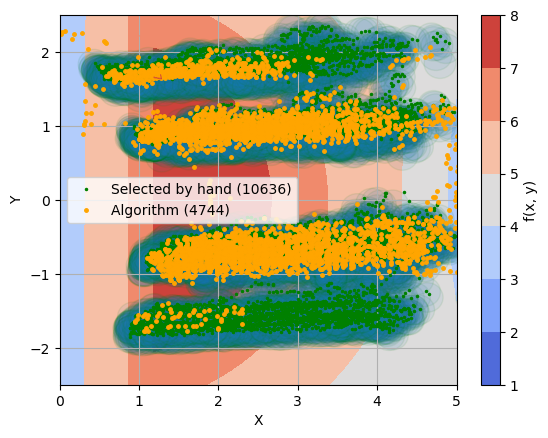

In [4]:
import matplotlib.pyplot as plt
from contours import add_levels_to_plot
from plot_utils import plot_feature, plot_feature_with_bbox

# Plot features
fig = plt.figure()
ax = fig.add_subplot(111)


# Plot the mean point
add_levels_to_plot(ax)
# ax.set_title(f"Positions with sizes of {len(tp_mean_points_x)} objects.")
plot_feature_with_bbox(
    ax, tp_features, f"Selected by hand ({len(tp_features)})", "g", "g"
)
plot_feature(ax, alg_features, f"Algorithm ({len(alg_features)})", "orange")

ax.grid(True)

# Set plot limits
ax.set_xlim(0, 5)
ax.set_ylim(-2.5, 2.5)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")


ax.legend()


## Find same


In [3]:
from collections import defaultdict
from feature import group_features_by_timestamp, is_point_in_bounding_box, distance


# return timestamp_dict
grouped_features = group_features_by_timestamp(tp_features, alg_features)
matched_alg = []
matched_rviz = []
false_alg = []
missed = []

grouped_features = dict(sorted(grouped_features.items()))
i = 0
for key, features_at_timestamp in grouped_features.items():
    selected_features_at_this_time = features_at_timestamp["tp"]
    algorithm_features_at_this_time = features_at_timestamp["alg"]
    i += 1

    for tp_feature in selected_features_at_this_time:
        for alg_feature in algorithm_features_at_this_time:
            if alg_feature.label == "matched":
                continue

            if is_point_in_bounding_box(
                alg_feature.mean_point, tp_feature.box_size, tp_feature.box_center
            ):
                tp_feature.label = "matched"
                alg_feature.label = "matched"
                break

    for alg_feature in algorithm_features_at_this_time:
        if alg_feature.label is None:
            alg_feature.label = "false"

    for tp_feature in selected_features_at_this_time:
        if tp_feature.label is None:
            tp_feature.label = "missed"

    matched_alg += [feature for feature in algorithm_features_at_this_time if feature.label == "matched"]
    matched_rviz += [feature for feature in selected_features_at_this_time if feature.label == "matched"]
    false_alg += [feature for feature in algorithm_features_at_this_time if feature.label == "false"]
    missed += [feature for feature in selected_features_at_this_time if feature.label == "missed"]


Found dict_keys([]) timestamps


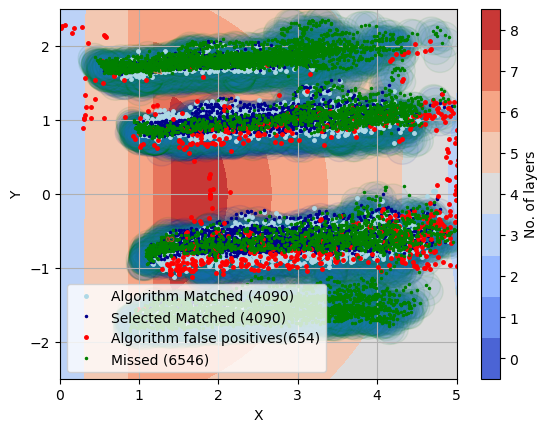

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from contours import f
from plot_utils import plot_feature, plot_feature_with_bbox

def add_levels_to_plot(ax):
    # Generate x and y values
    x_values = np.linspace(-3, 9, 150)
    y_values = np.linspace(-8, 8, 150)

    # Create a grid of (x, y) values
    X, Y = np.meshgrid(x_values, y_values)

    # Evaluate the function at each point on the grid for all array
    # Z = f(X, Y)

    # Initialize an array for function values
    Z = np.zeros_like(X)

    # Calculate function values for each (x, y) pair
    for i in range(len(x_values)):
        for j in range(len(y_values)):
            Z[j, i] = f(X[j, i], Y[j, i])

    # Plot the contour lines
    contour = ax.contourf(X, Y, Z, levels=np.arange(0, 10, 1), cmap="coolwarm")
    # Add labels with function values to the contour lines
    ax.clabel(contour, inline=True, fontsize=8, fmt="%1.0f")
    colorbar = plt.colorbar(contour, label='No. of layers')
    # colorbar.ax.set_xtick([])
    colorbar.ax.set_yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5 ],["0", "1", "2", "3", "4", "5", "6", "7", "8"])


# Plot features
fig = plt.figure()
ax = fig.add_subplot(111)




add_levels_to_plot(ax)

plot_feature(ax, matched_alg, f"Algorithm Matched ({len(matched_alg)})", "lightblue")
plot_feature_with_bbox(ax, matched_rviz, f"Selected Matched ({len(matched_rviz)})", "darkblue", "darkblue")
plot_feature(ax, false_alg, f"Algorithm false positives({len(false_alg)})", "red")
plot_feature_with_bbox(ax, missed, f"Missed ({len(missed)})", "green", "green")

ax.grid(True)

# Set plot limits
ax.set_xlim(0, 5)
ax.set_ylim(-2.5, 2.5)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax.legend(loc="lower left")

# Selecting points inside f(x, y)

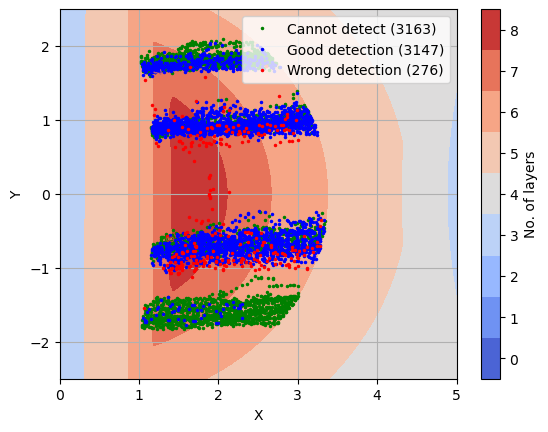

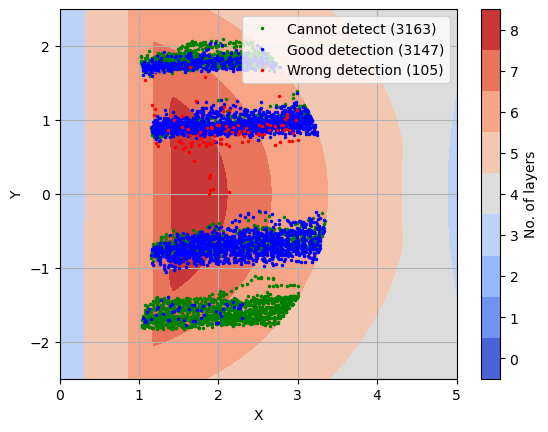

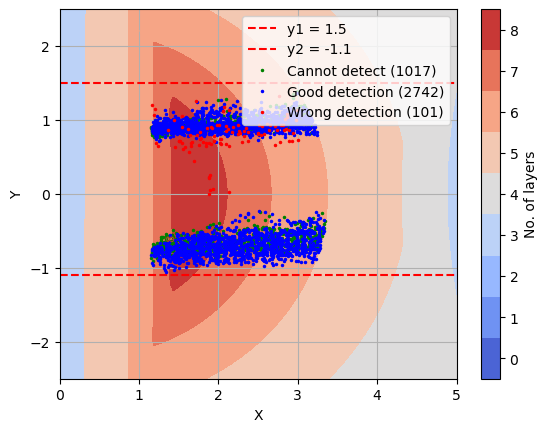

wrong: ['1626350368_224200000', '1626350368_22476000', '1626350368_930224000', '1626350371_855108000', '1626350372_56855000', '1626350373_166271000', '1626350373_670721000', '1626350373_973179000', '1626350375_284318000', '1626350377_402348000', '1626350378_612653000', '1626350399_591308000', '1626350400_801604000', '1626350406_147138000', '1626350407_660013000', '1626350408_466885000', '1626350408_668603000', '1626350408_870337000', '1626350409_576334000', '1626350409_979768000', '1626350410_181498000', '1626350410_383371000', '1626350410_584925000', '1626350410_685783000', '1626350410_80629000', '1626350410_887850000', '1626350411_190082000', '1626350411_492656000', '1626350411_593501000', '1626350411_795226000', '1626350411_89216000', '1626350411_896086000', '1626350411_996953000', '1626350411_996953000', '1626350412_299515000', '1626350412_97826000', '1626350417_745905000', '1626350418_754494000', '1626350423_495032000', '1626350424_301734000', '1626350424_301734000', '1626350426_1

/tmp/ipykernel_91696/3135730303.py:143: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found dict_keys([]) timestamps
Found di

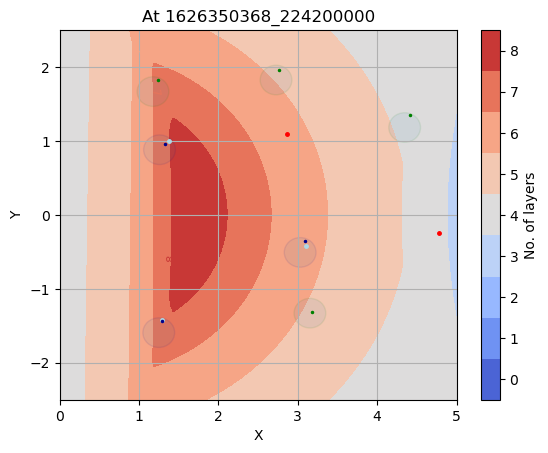

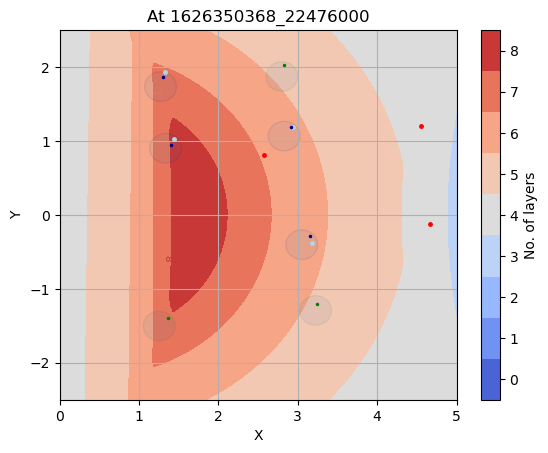

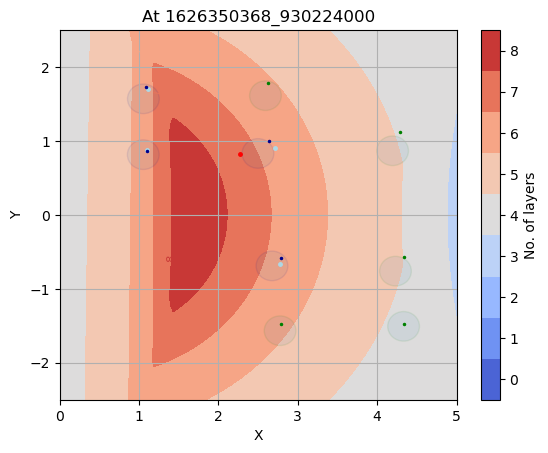

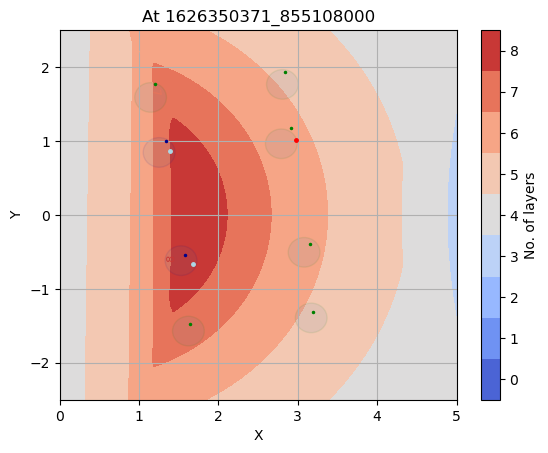

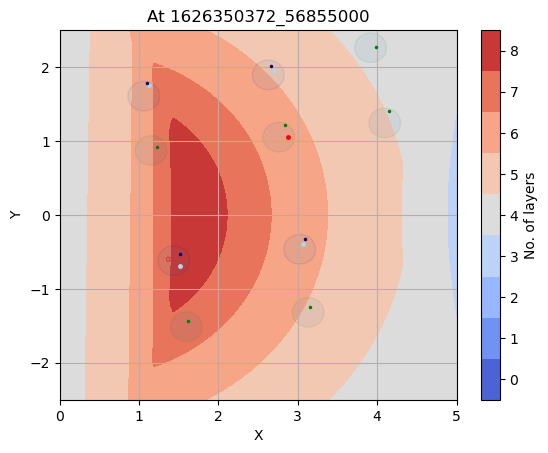

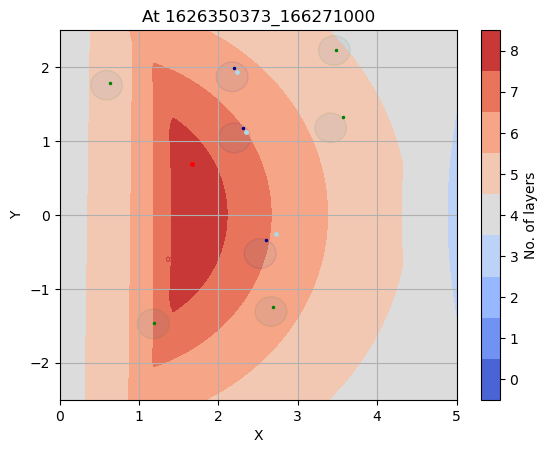

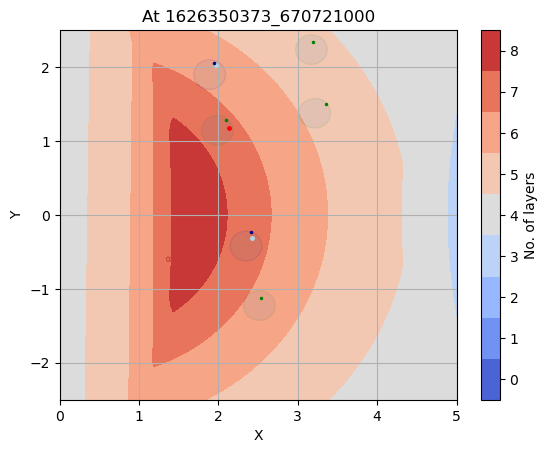

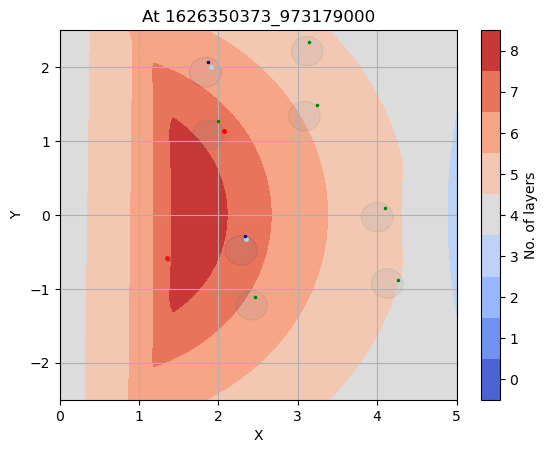

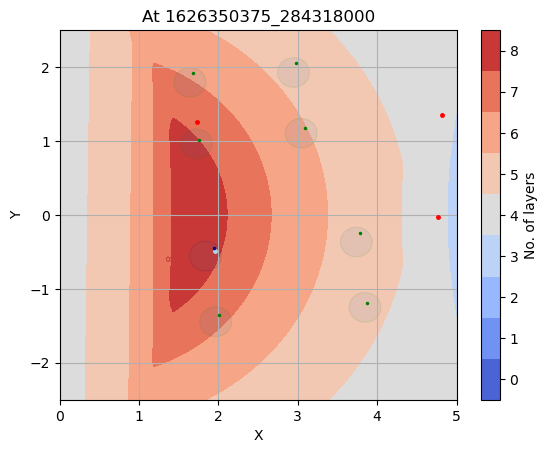

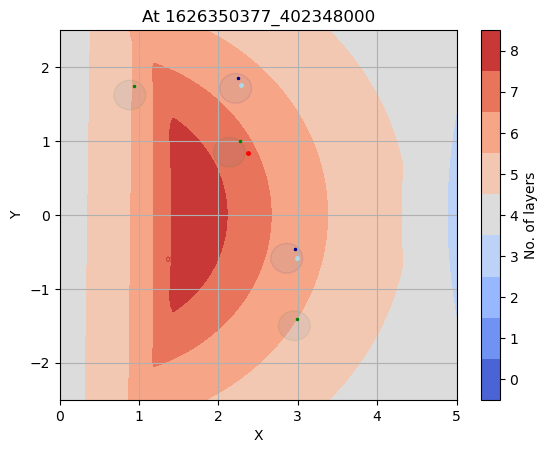

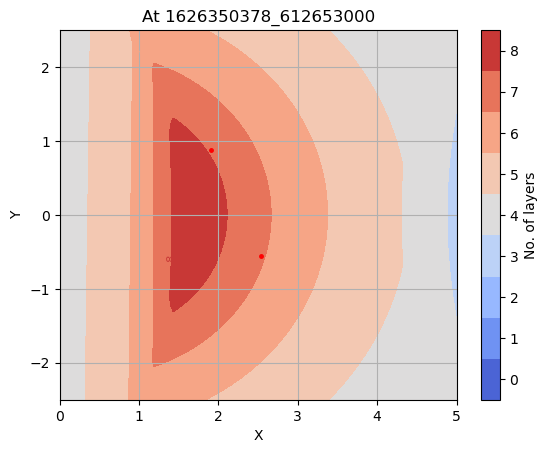

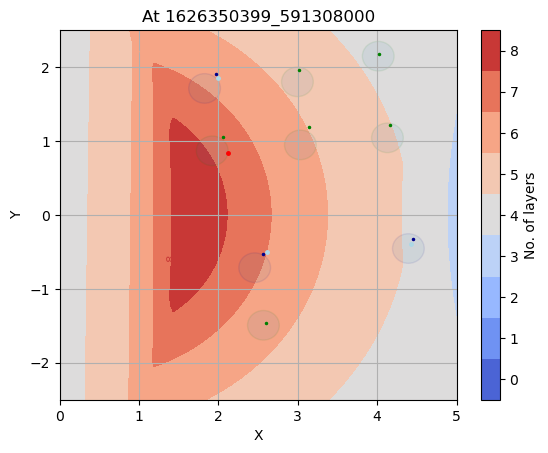

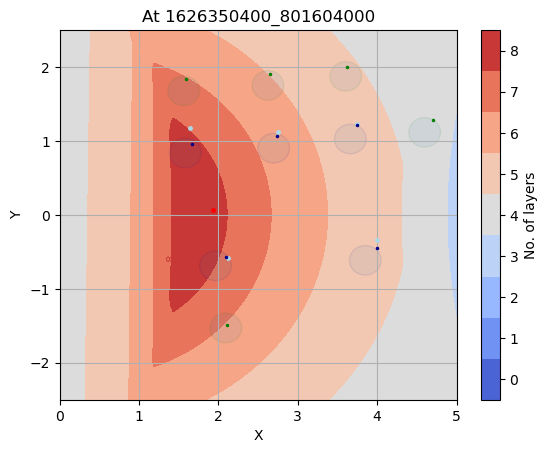

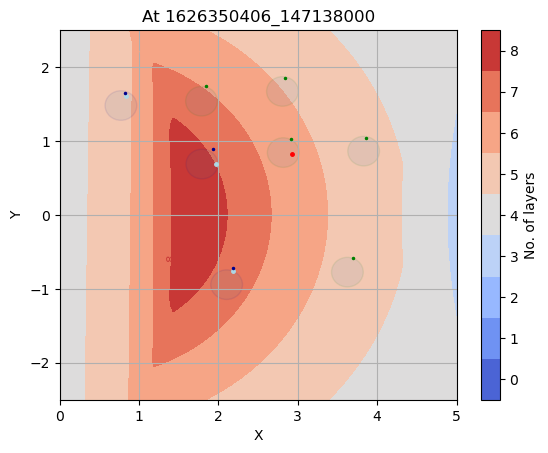

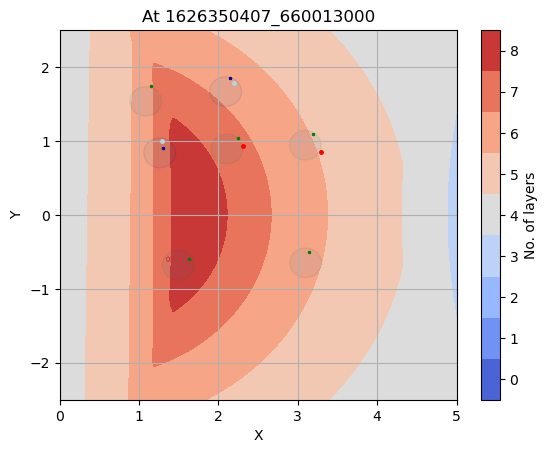

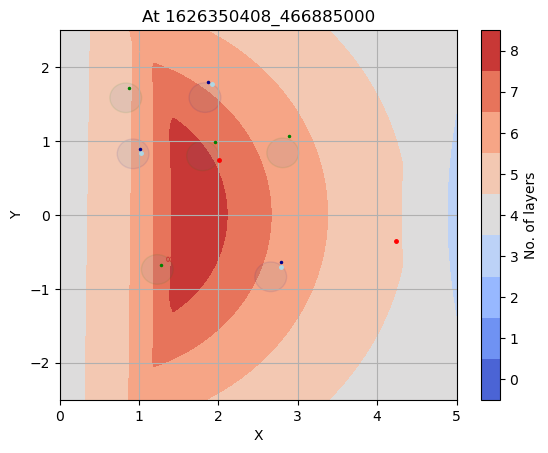

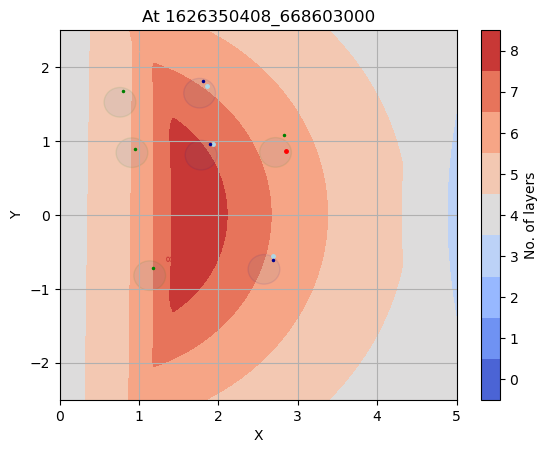

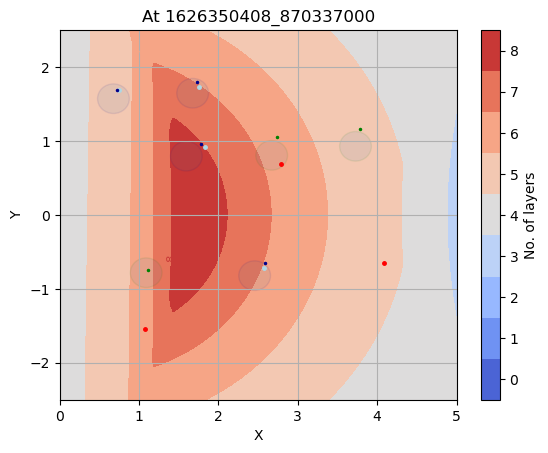

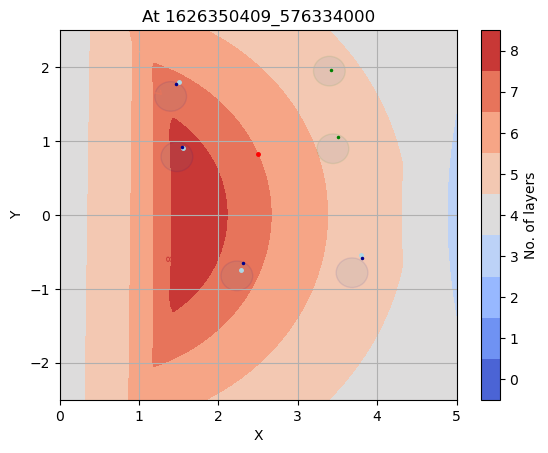

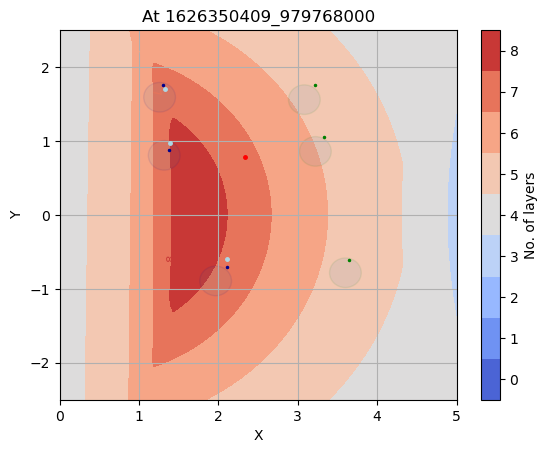

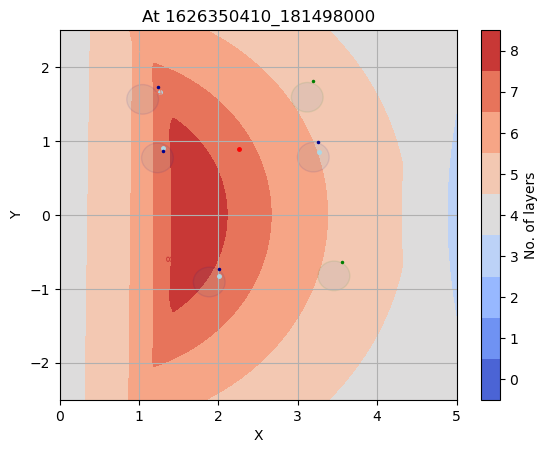

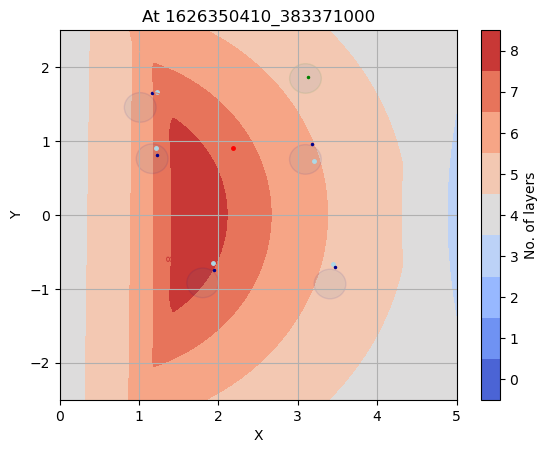

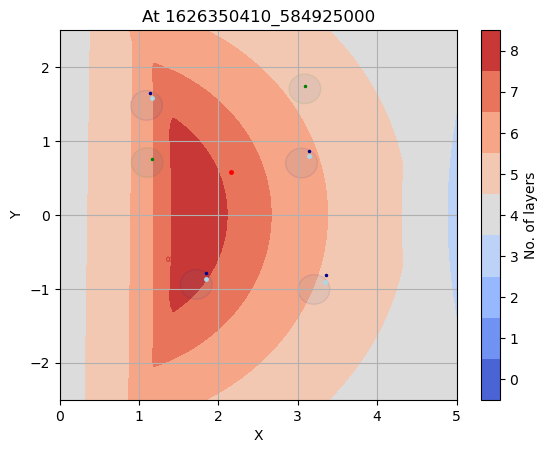

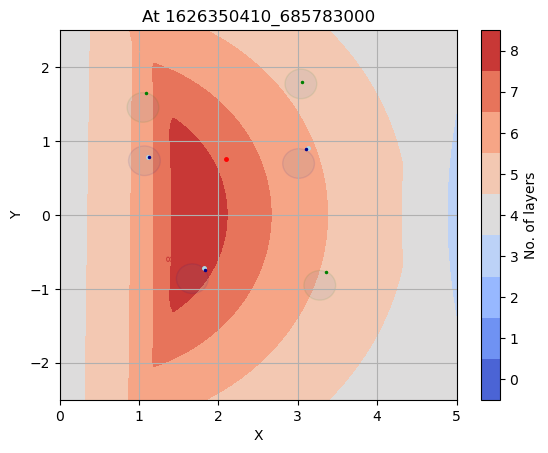

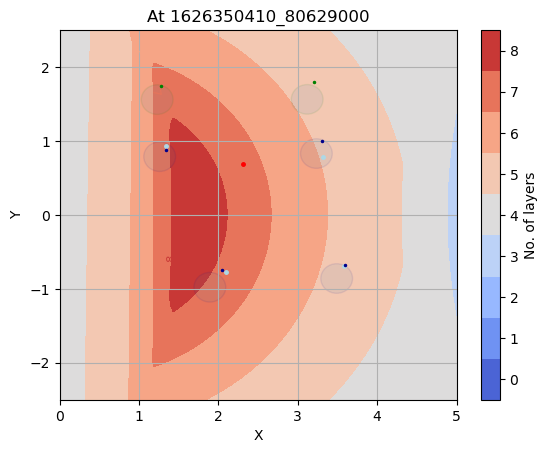

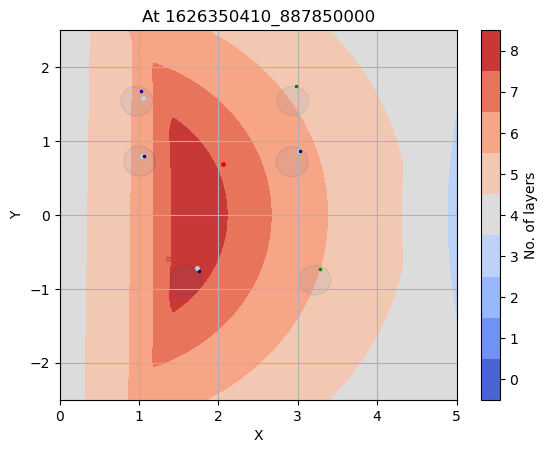

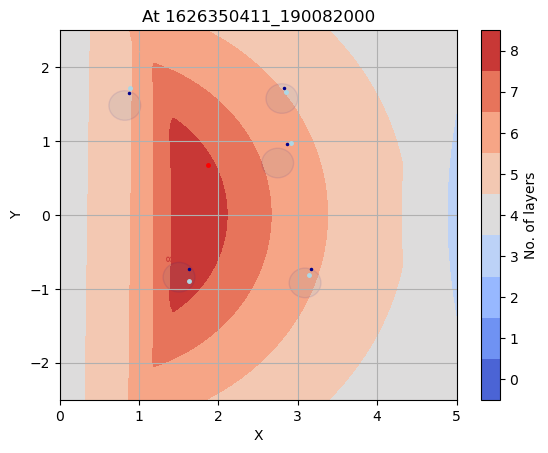

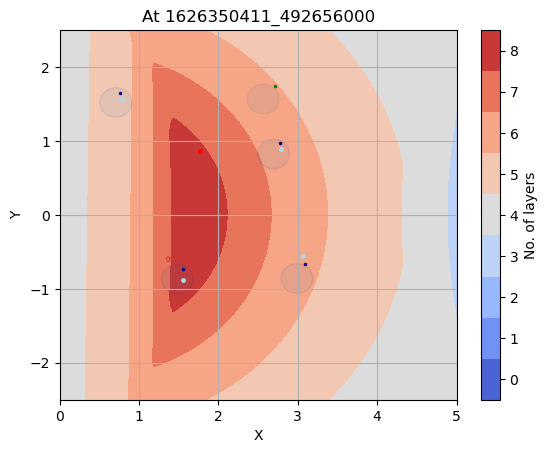

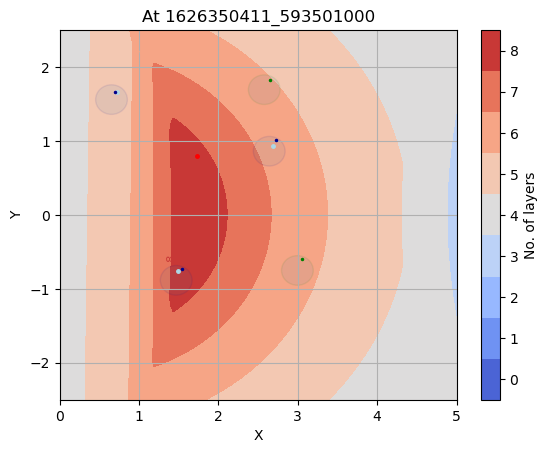

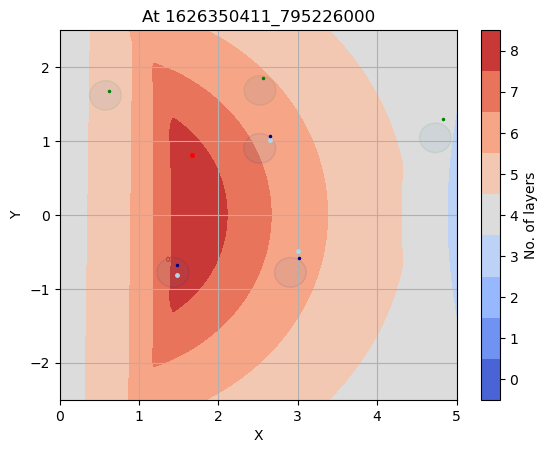

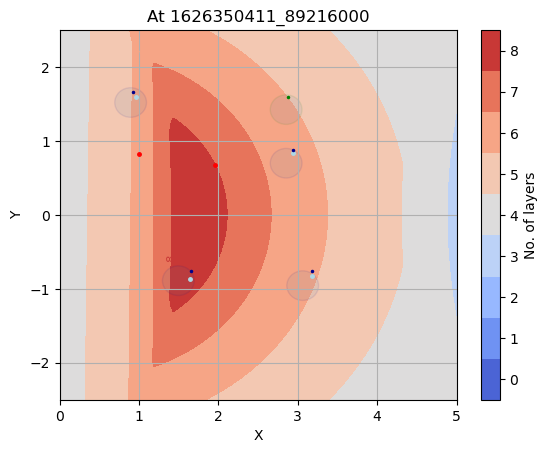

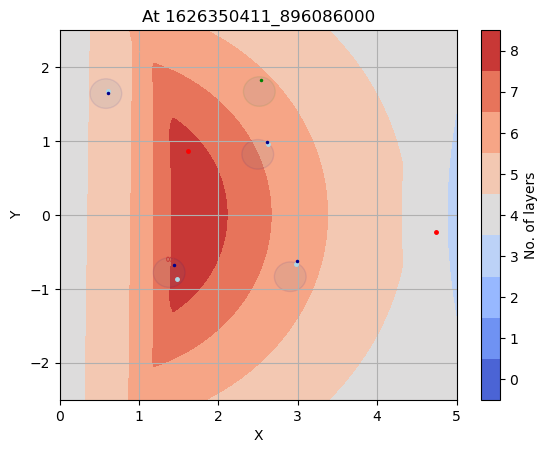

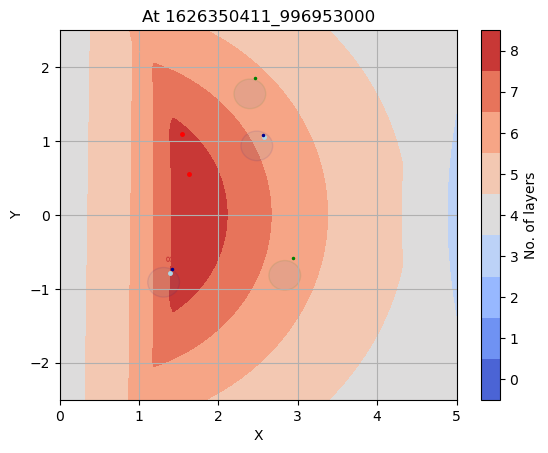

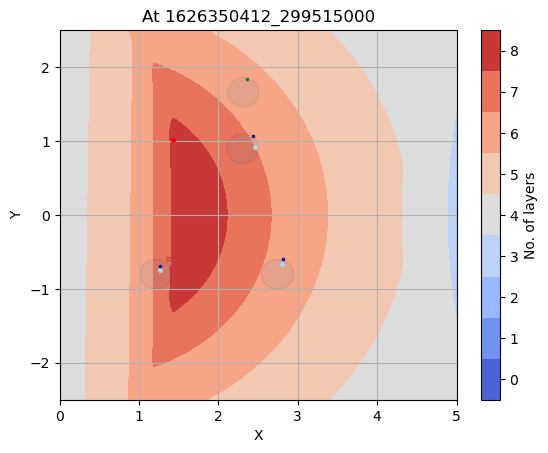

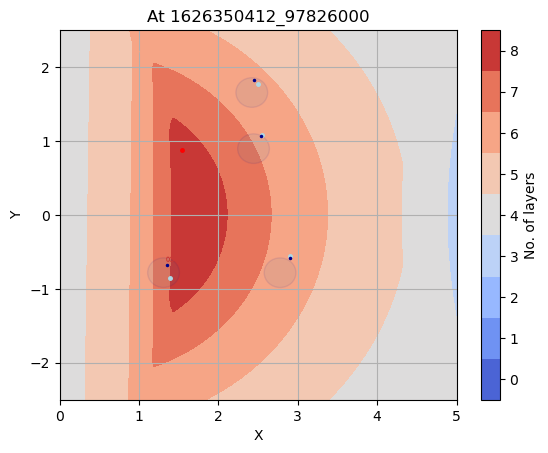

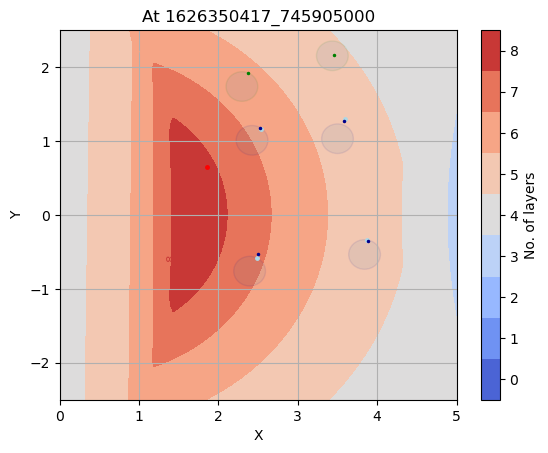

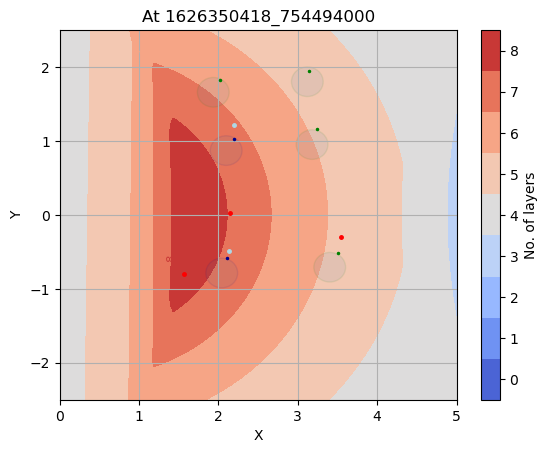

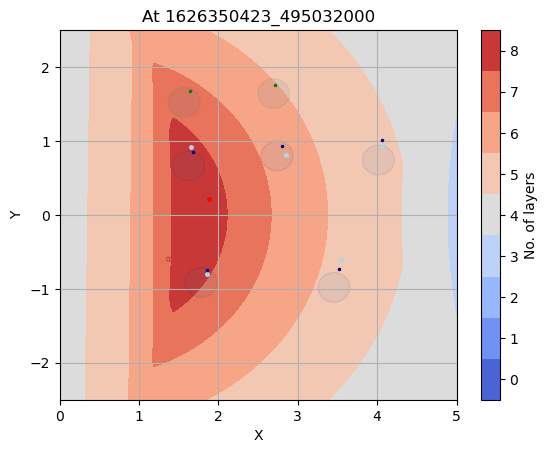

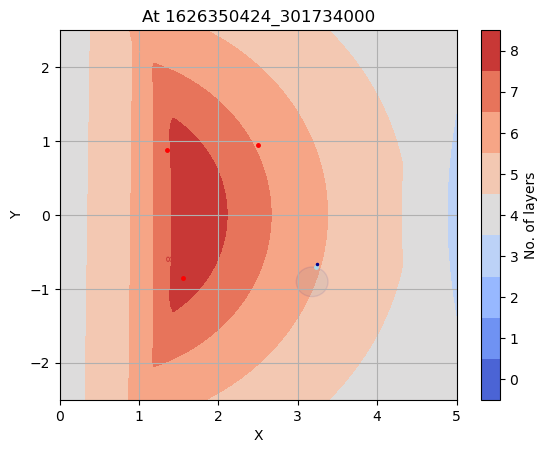

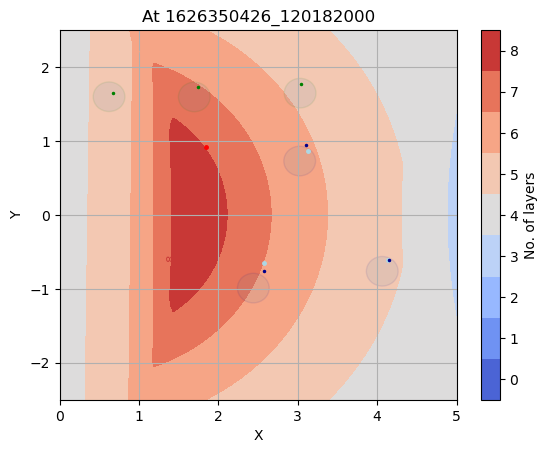

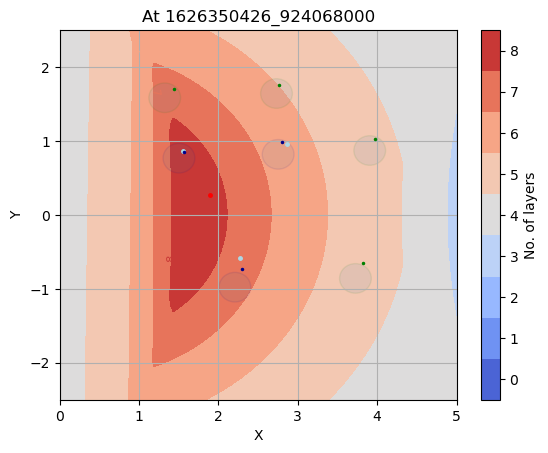

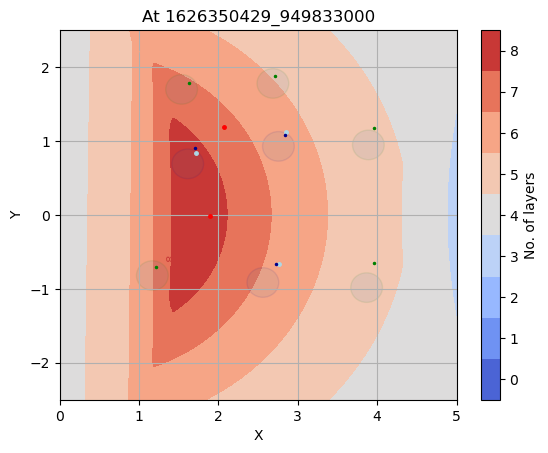

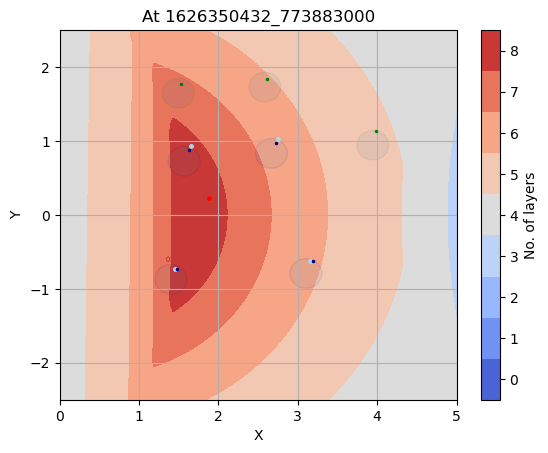

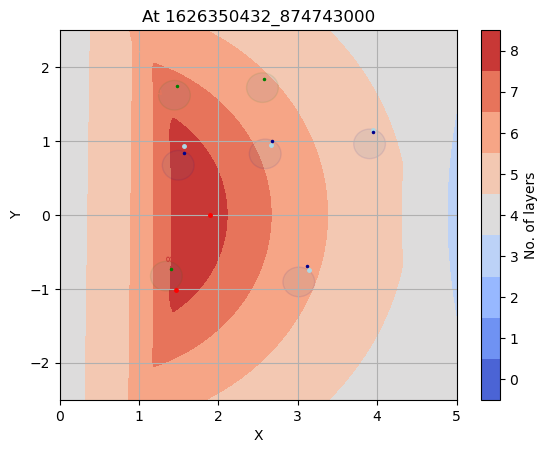

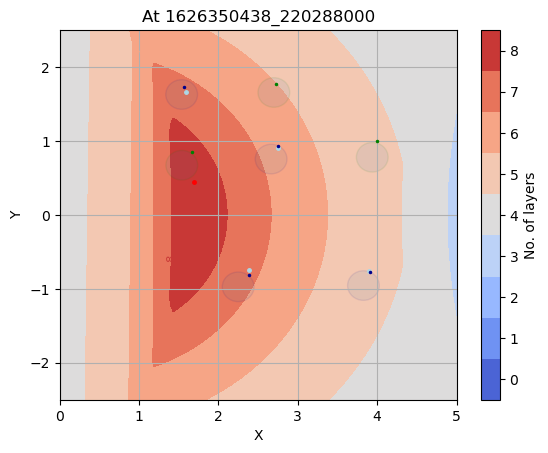

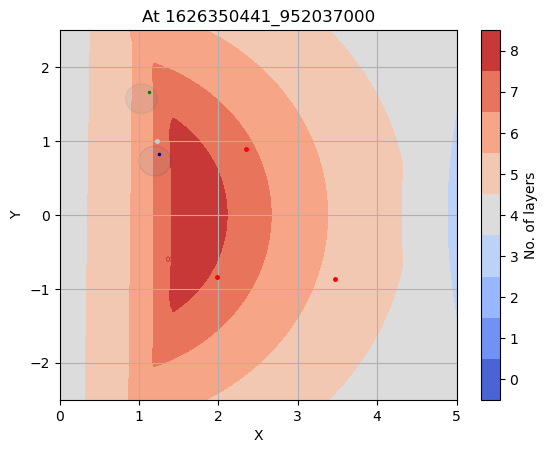

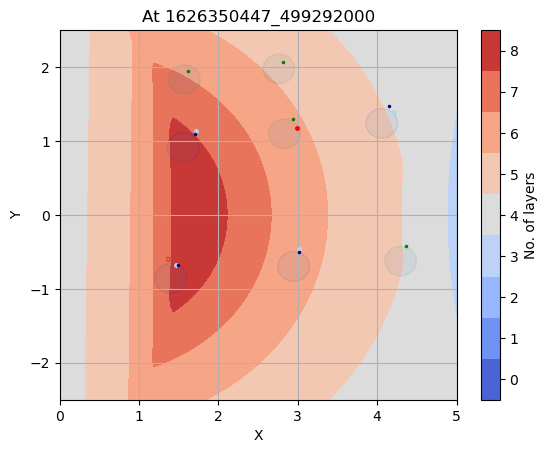

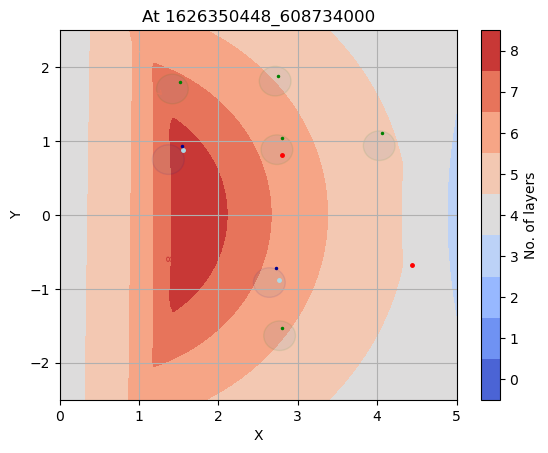

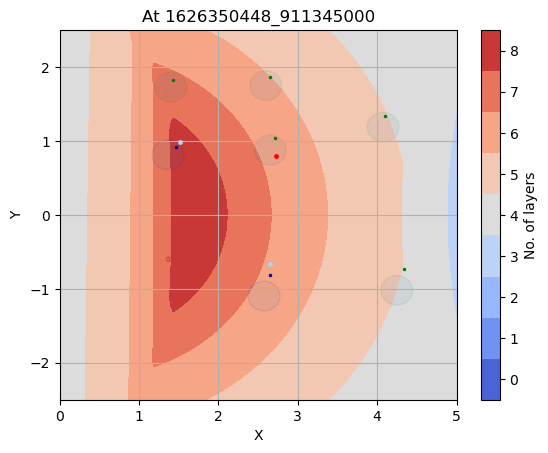

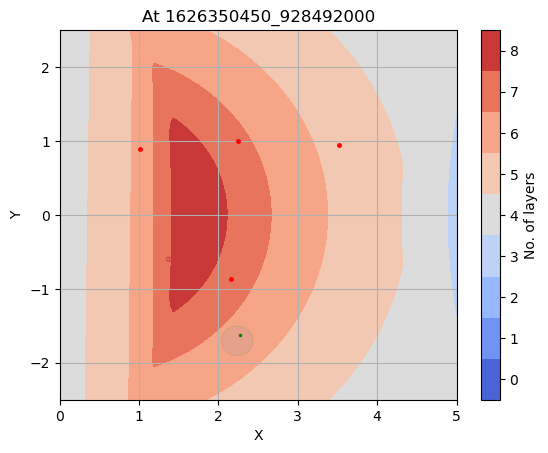

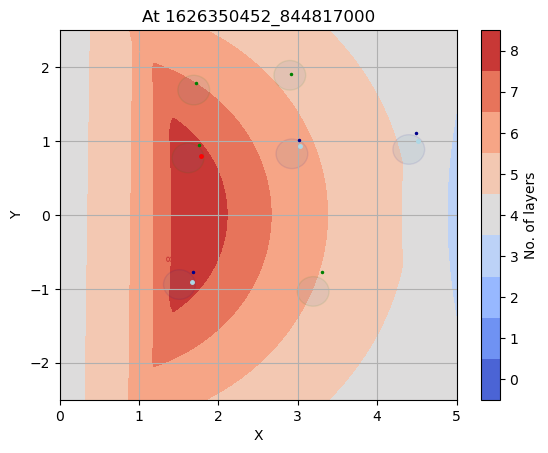

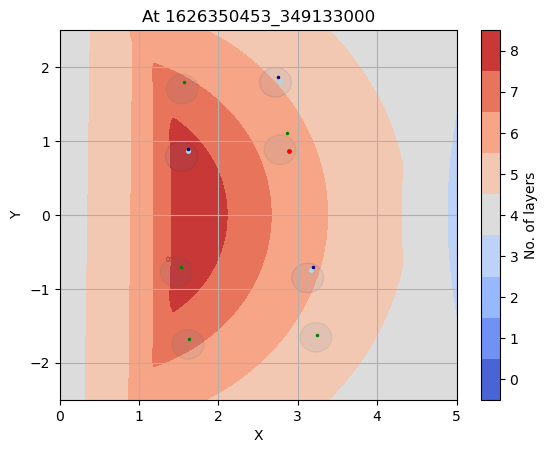

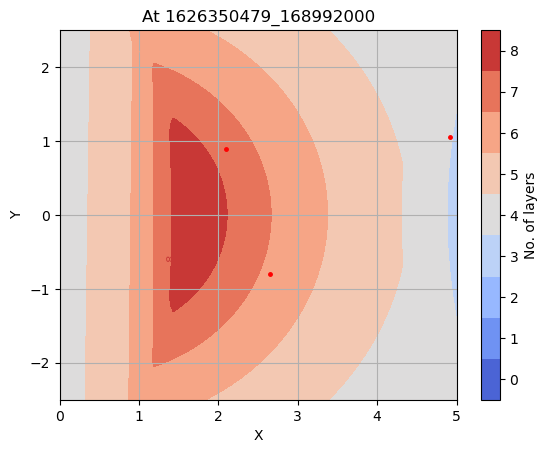

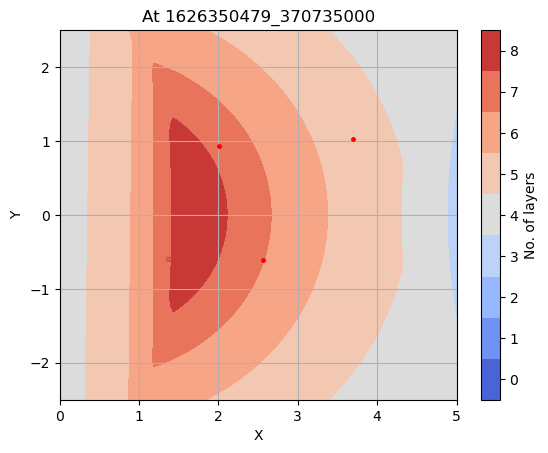

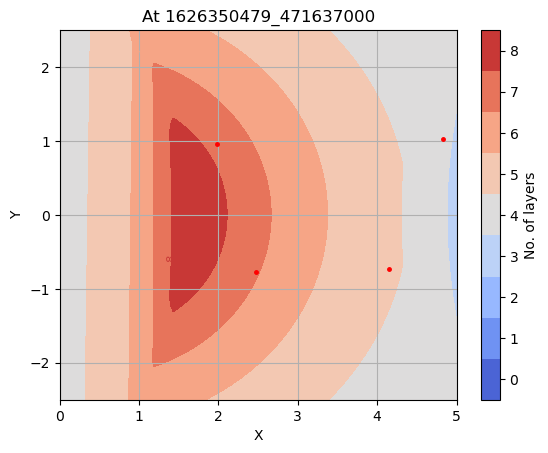

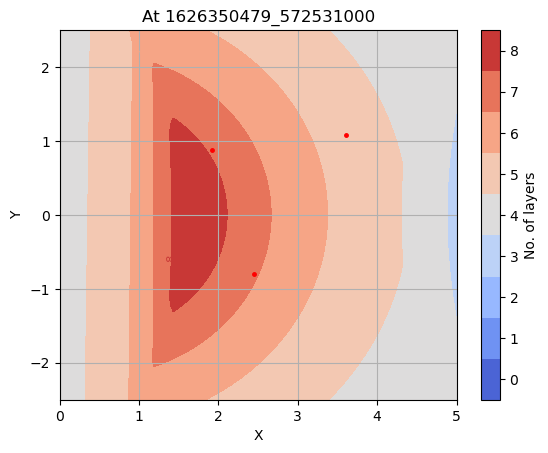

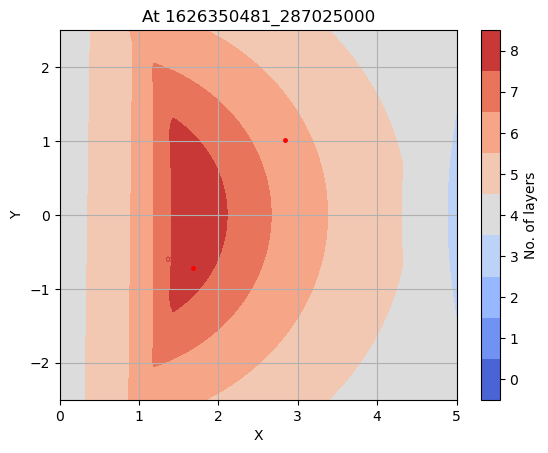

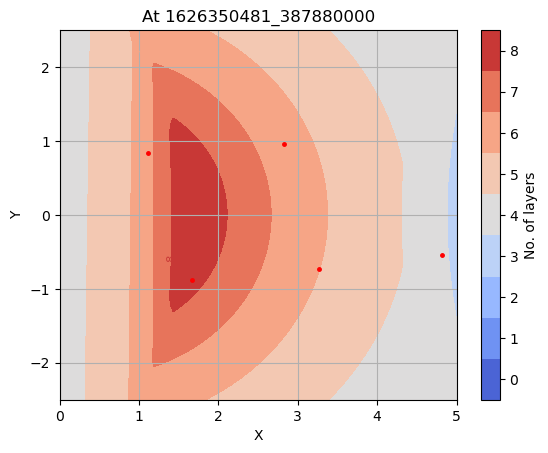

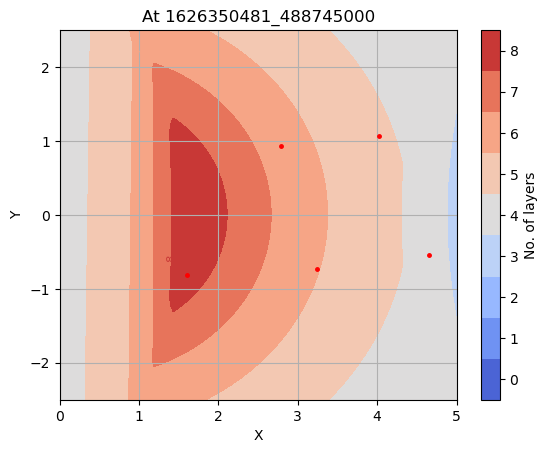

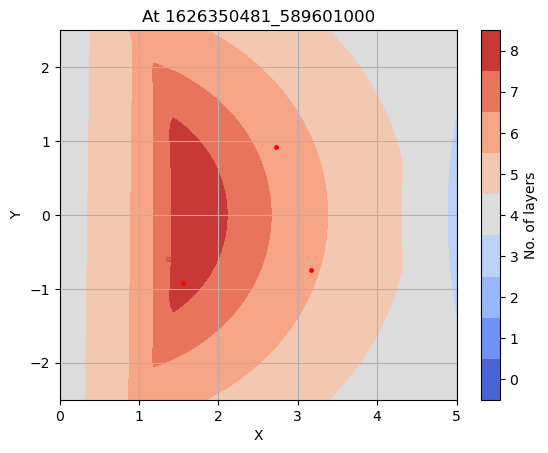

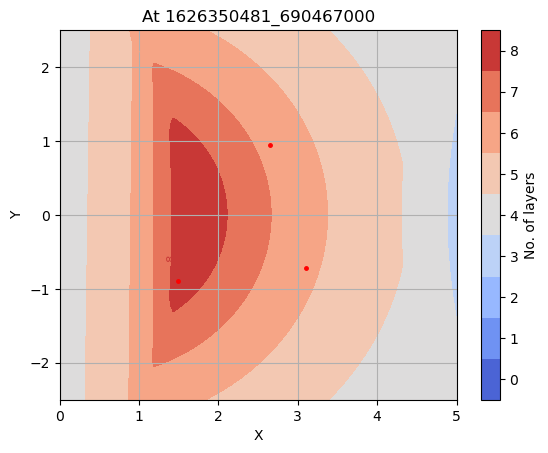

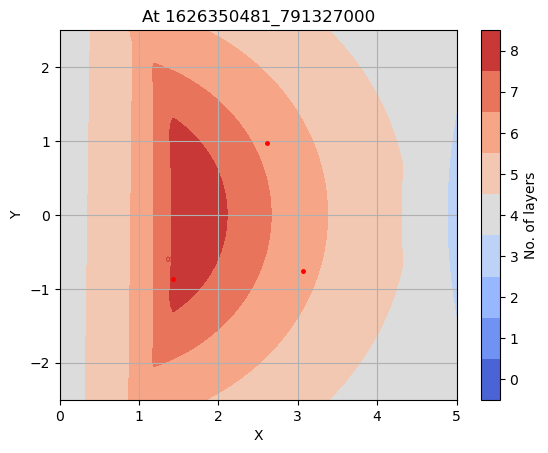

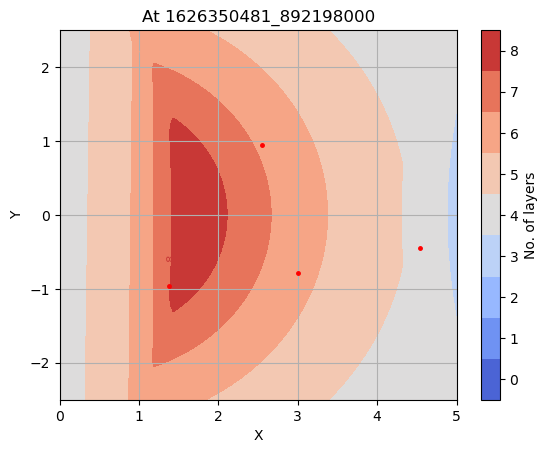

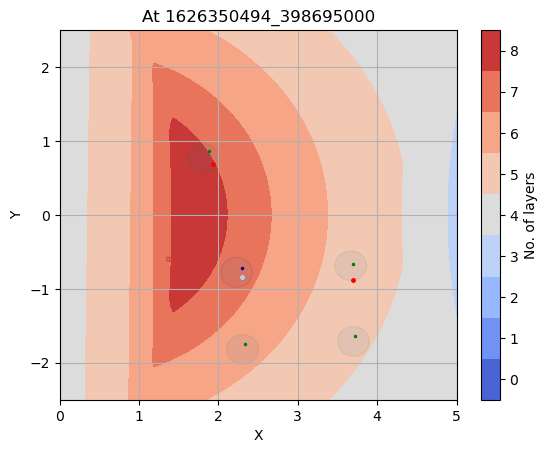

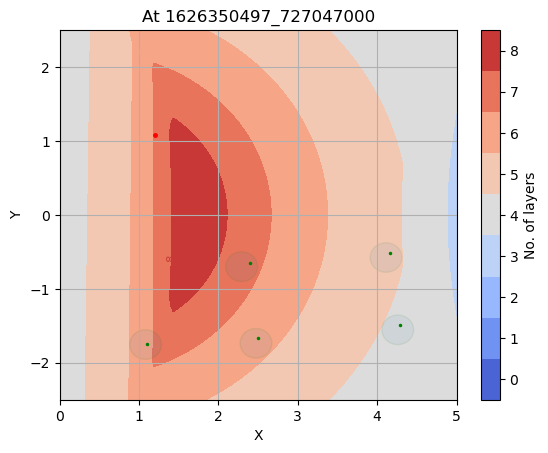

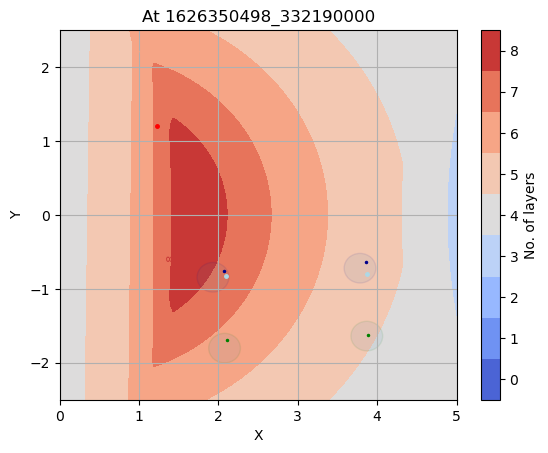

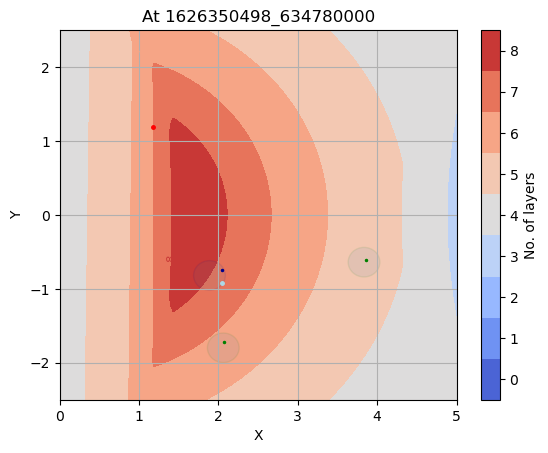

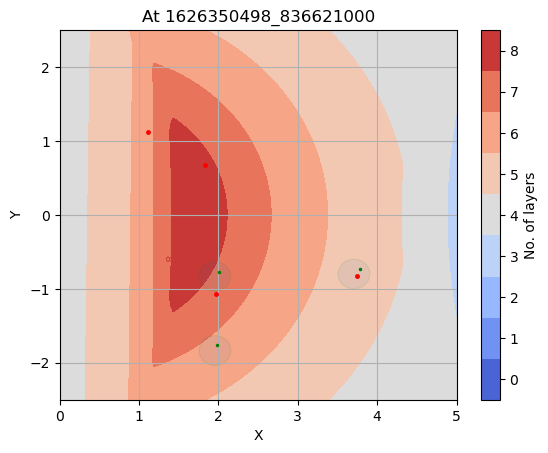

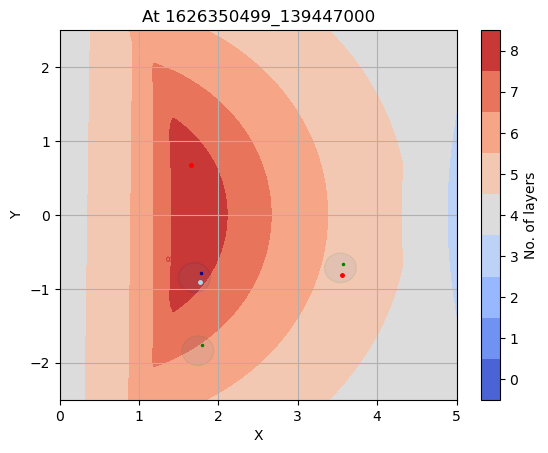

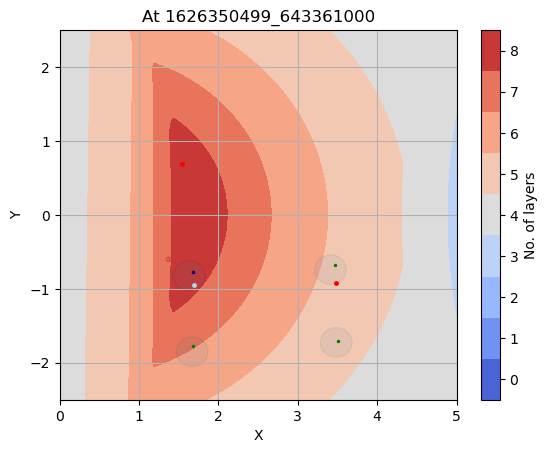

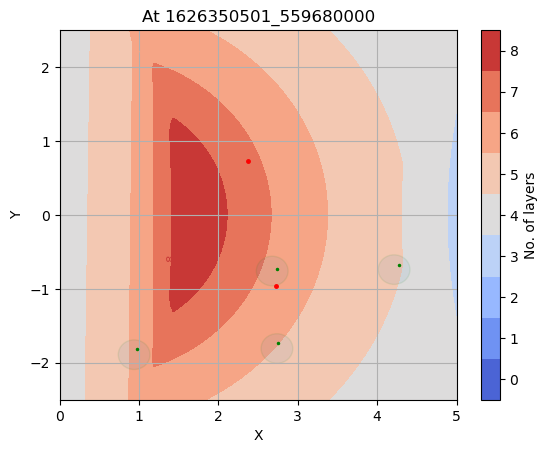

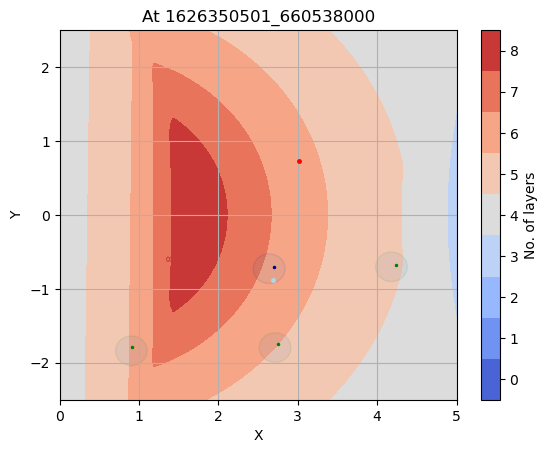

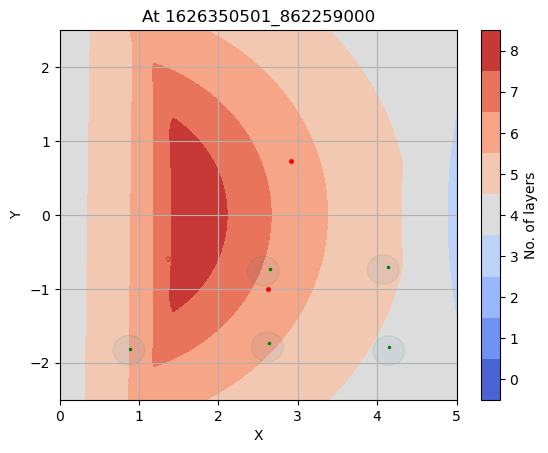

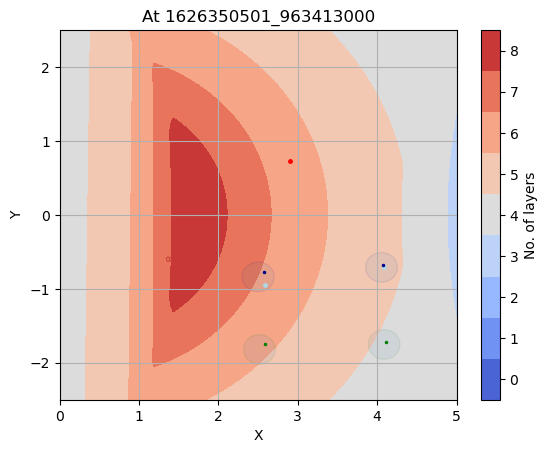

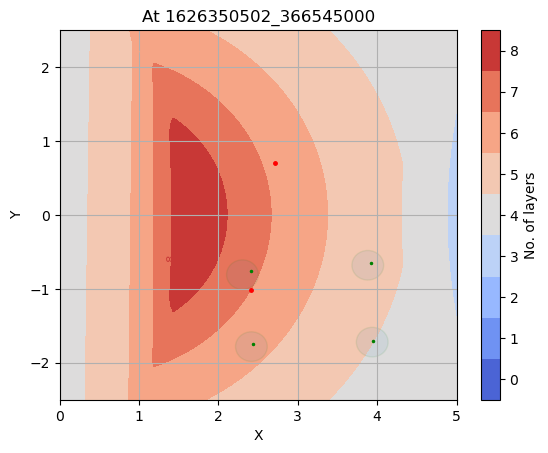

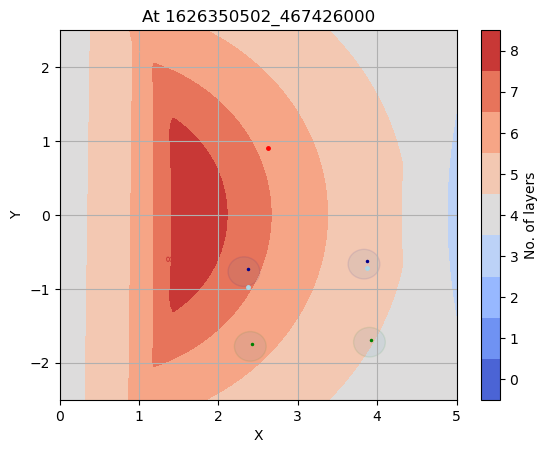

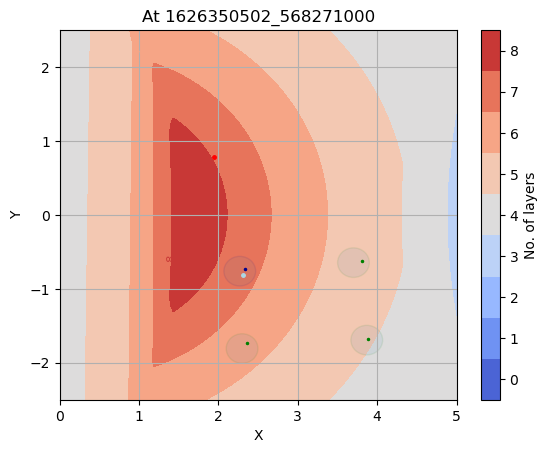

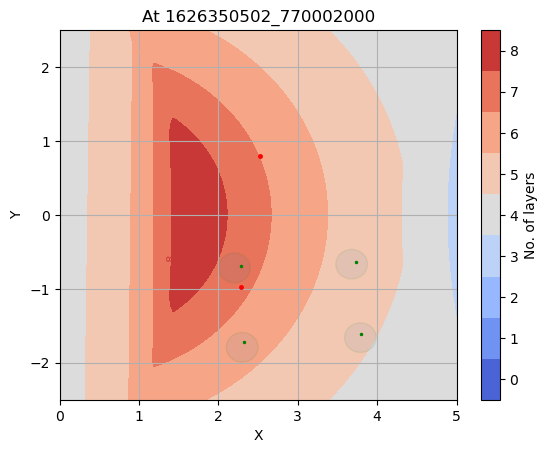

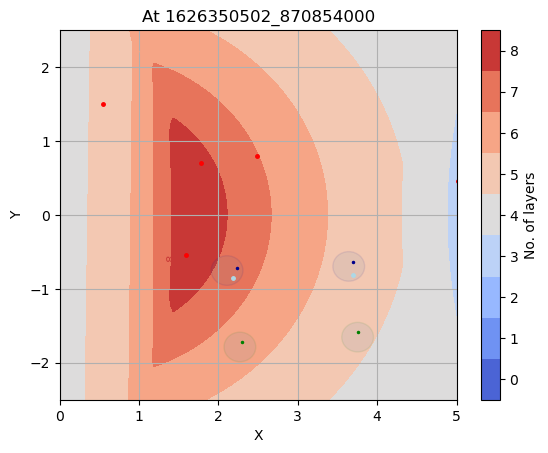

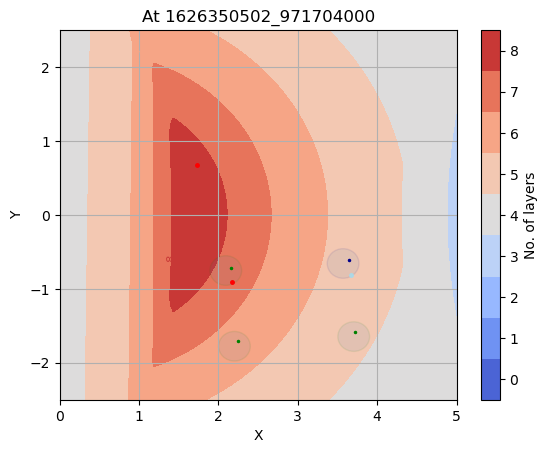

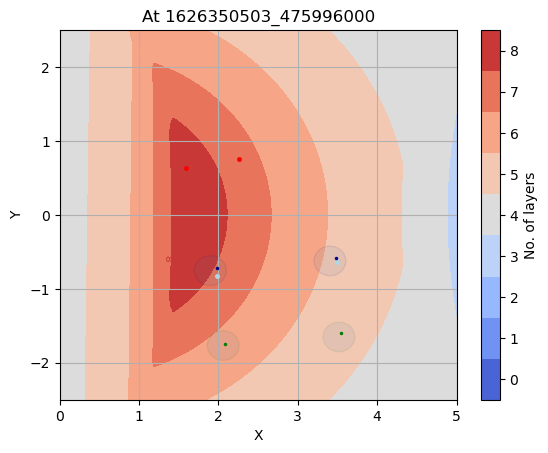

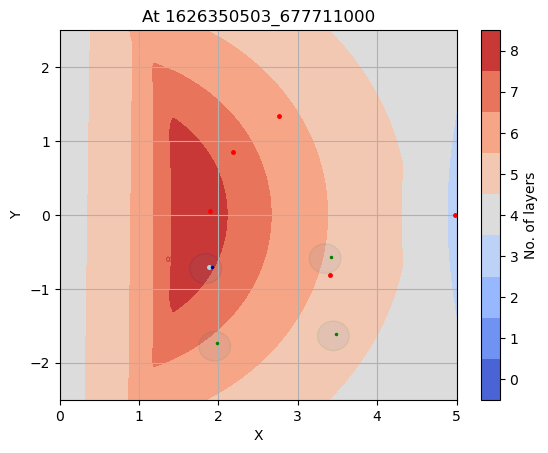

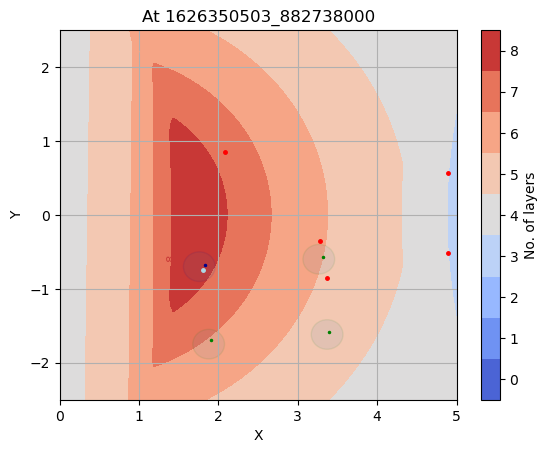

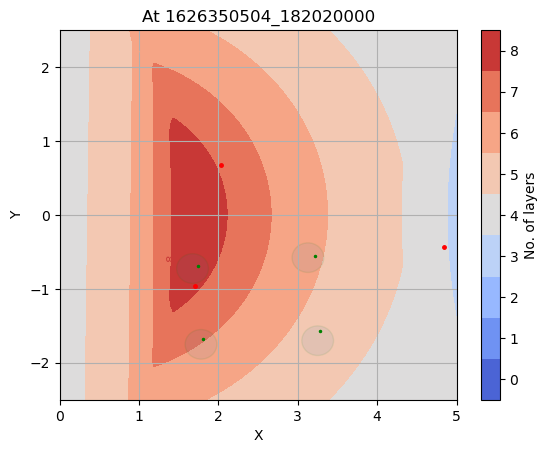

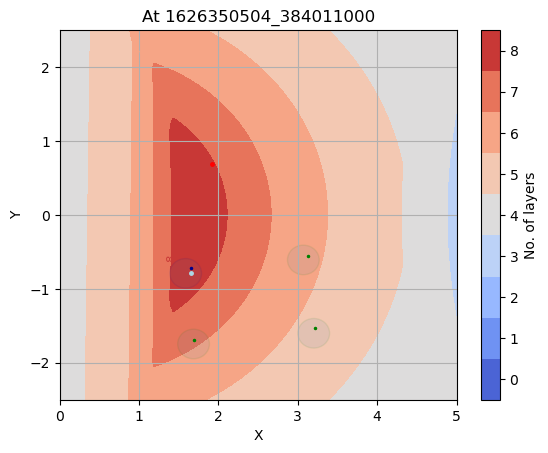

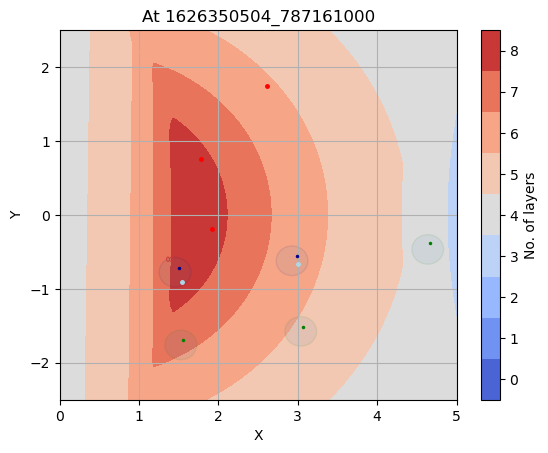

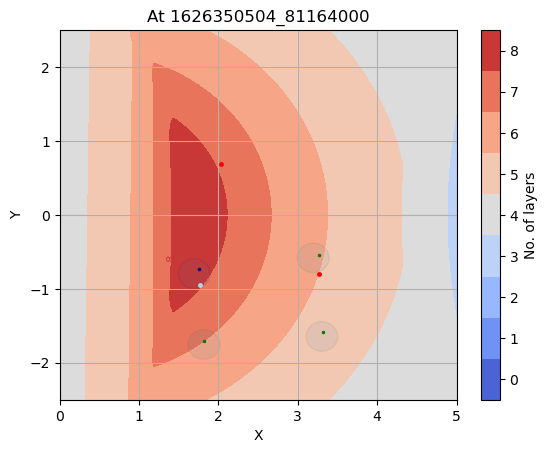

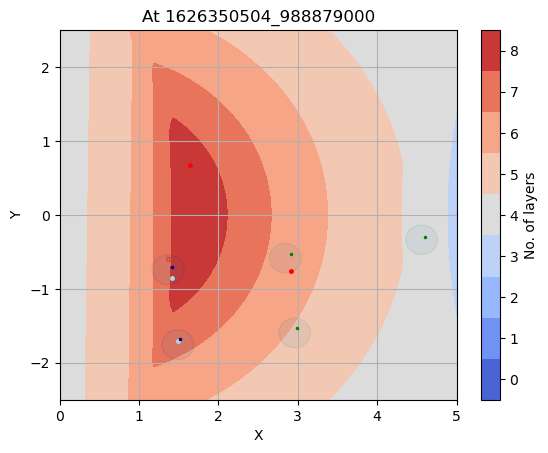

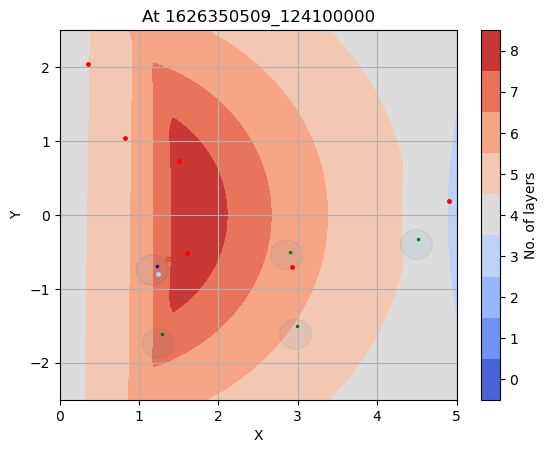

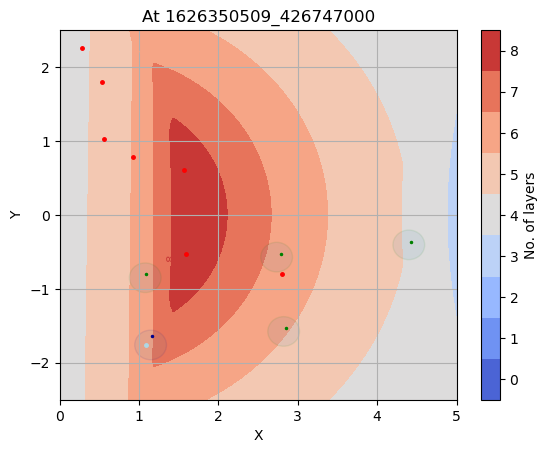

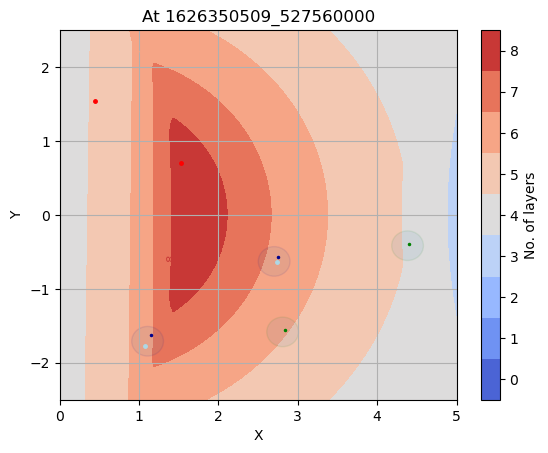

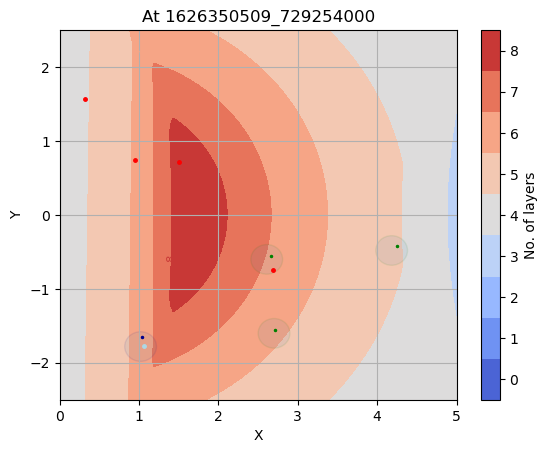

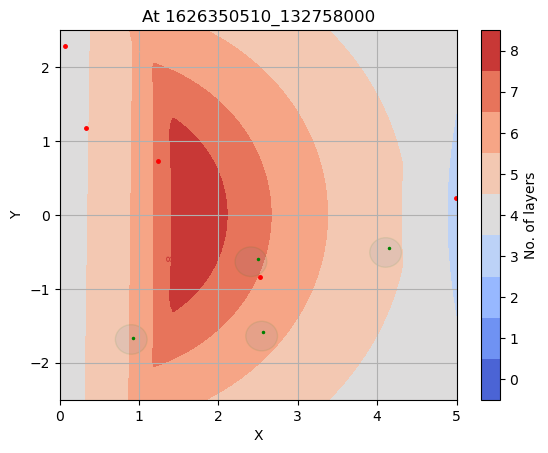

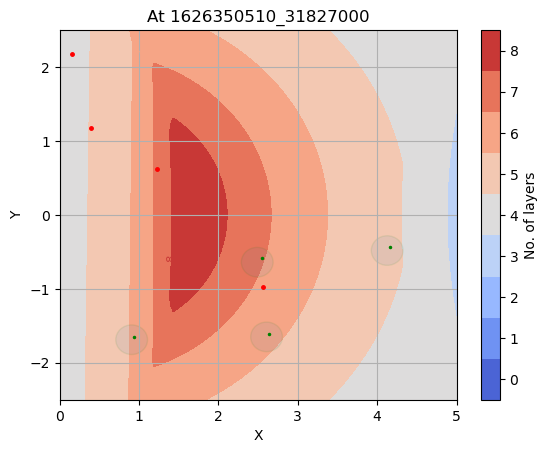

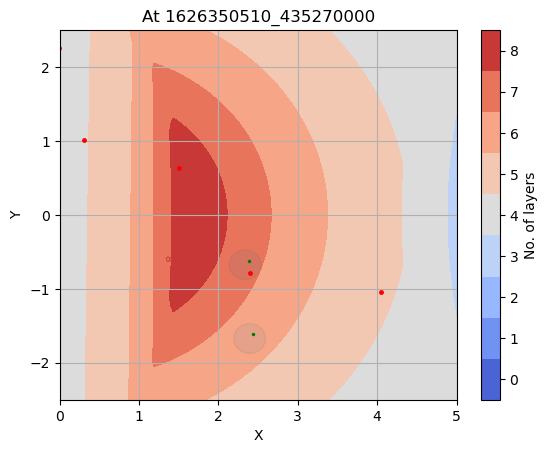

In [7]:
from contours import f


def get_feature_at_levels(features, down, up):
    points_at_levels = []
    for feature in features:
        mean = feature.mean_point
        index = int(np.ceil((f(mean[0], mean[1]))))
        if index > down and index < up:
            points_at_levels.append(feature)
    return points_at_levels


def get_x_and_y_from_feature(features):
    x = []
    y = []
    for feature in features:
        x.append(feature.mean_point[0])
        y.append(feature.mean_point[1])
    return x, y


def plot_compare(ax, good, wrong, cannot):
    good_x, good_y = get_x_and_y_from_feature(good)
    wrong_x, wrong_y = get_x_and_y_from_feature(wrong)
    tp_x, tp_y = get_x_and_y_from_feature(cannot)

    add_levels_to_plot(ax)
    ax.plot(
        tp_x,
        tp_y,
        ".",
        c="g",
        label=f"Cannot detect ({len(cannot)})",
        markersize=3,
    )


    ax.plot(
        good_x,
        good_y,
        ".",
        c="b",
        label=f"Good detection ({len(good)})",
        markersize=3,
    )

    ax.plot(
        wrong_x,
        wrong_y,
        ".",
        c="r",
        label=f"Wrong detection ({len(wrong)})",
        markersize=3,
    )
    
    ax.grid(True)

    # Set plot limits
    ax.set_xlim(0, 5)
    ax.set_ylim(-2.5, 2.5)

    # Set labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    ax.legend(loc="upper right")

    # Show the plot
    plt.show()


clamped_good = get_feature_at_levels(matched_alg, 6, 10)
clamped_wrong = get_feature_at_levels(false_alg, 6, 10)
clamped_cannot = get_feature_at_levels(missed, 6, 10)

fig = plt.figure()
ax = fig.add_subplot(111)
plot_compare(ax, clamped_good, clamped_wrong, clamped_cannot)

# remove wrong points where y is negative
clamped_wrong_with_positive_y = [feature for feature in clamped_wrong if feature.mean_point[1] > 0]
fig = plt.figure()
ax = fig.add_subplot(111)
plot_compare(ax, clamped_good, clamped_wrong_with_positive_y, clamped_cannot)

# plot line at y = 1.8
fig = plt.figure()
ax = fig.add_subplot(111)
y = 1.5
ax.axhline(y=y, color="r", linestyle="--", label=f"y1 = {y}")
y1=-1.1
ax.axhline(y=y1, color="r", linestyle="--", label=f"y2 = {y1}")

clamped_good_1_row = [feature for feature in clamped_good if feature.mean_point[1] < y and feature.mean_point[1] > y1]
clamped_wrong_1_row = [feature for feature in clamped_wrong_with_positive_y if feature.mean_point[1] < y and feature.mean_point[1] > y1]
clamped_cannot_1_row = [feature for feature in clamped_cannot if feature.mean_point[1] < y  and feature.mean_point[1] > y1]


plot_compare(ax, clamped_good_1_row, clamped_wrong_1_row, clamped_cannot_1_row)

wrong_timestamps = [f"{feature.sec}_{feature.nanosec}" for feature in clamped_wrong_1_row]
cannot_timestamps = [f"{feature.sec}_{feature.nanosec}" for feature in clamped_cannot_1_row]
print(f"wrong: {wrong_timestamps}")

def plot_compare_at_timestamp(timestamp):

    # return timestamp_dict
    grouped_features = group_features_by_timestamp(tp_features, alg_features)
    matched_alg = []
    alg_false = []
    tp_true = []

    grouped_features = dict(sorted(grouped_features.items()))
    features_at_timestamp = grouped_features[timestamp]

    selected_features_at_this_time = features_at_timestamp["tp"]
    algorithm_features_at_this_time = features_at_timestamp["alg"]

    for tp_feature in selected_features_at_this_time:
        for alg_feature in algorithm_features_at_this_time:
            if alg_feature.label == "matched":
                continue

            if is_point_in_bounding_box(
                alg_feature.mean_point, tp_feature.box_size, tp_feature.box_center
            ):
                tp_feature.label = "matched"
                alg_feature.label = "matched"
                break

    for alg_feature in algorithm_features_at_this_time:
        if alg_feature.label is None:
            alg_feature.label = "false"

    for tp_feature in selected_features_at_this_time:
        if tp_feature.label is None:
            tp_feature.label = "missed"




    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(f"At {timestamp}")
    ax.grid()
    # Set plot limits
    ax.set_xlim(0, 5)
    ax.set_ylim(-2.5, 2.5)

    # Set labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    matched_alg = [feature for feature in algorithm_features_at_this_time if feature.label == "matched"]
    matched_rviz = [feature for feature in selected_features_at_this_time if feature.label == "matched"]
    false_alg = [feature for feature in algorithm_features_at_this_time if feature.label == "false"]
    missed = [feature for feature in selected_features_at_this_time if feature.label == "missed"]
    add_levels_to_plot(ax)

    # plot_feature_with_bbox(ax, selected_features_at_this_time, f"Selected by hand ({len(selected_features_at_this_time)})", "g", "g")
    plot_feature(ax, matched_alg, f"Algorithm Matched ({len(matched_alg)})", "lightblue")
    plot_feature_with_bbox(ax, matched_rviz, f"Selected Matched ({len(matched_rviz)})", "darkblue", "darkblue")
    plot_feature(ax, false_alg, f"Algorithm false positives({len(false_alg)})", "red")
    plot_feature_with_bbox(ax, missed, f"Missed ({len(missed)})", "green", "green")
    

wrong_timestamps = set(wrong_timestamps)
for timestamp in sorted(wrong_timestamps):
    plot_compare_at_timestamp(timestamp)
print(f"cannot: {cannot_timestamps}")

# Zaznaczyć od 68,12 do 74.

Heatpoints

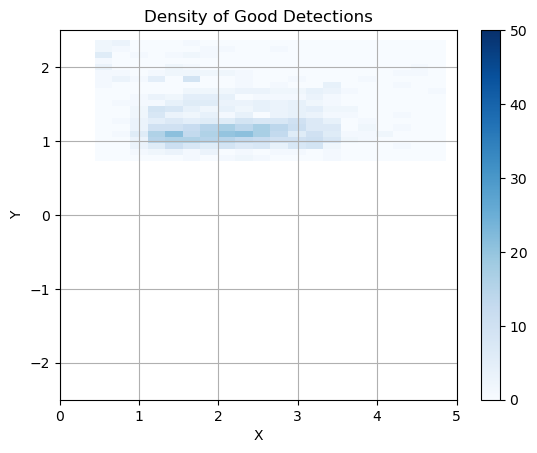

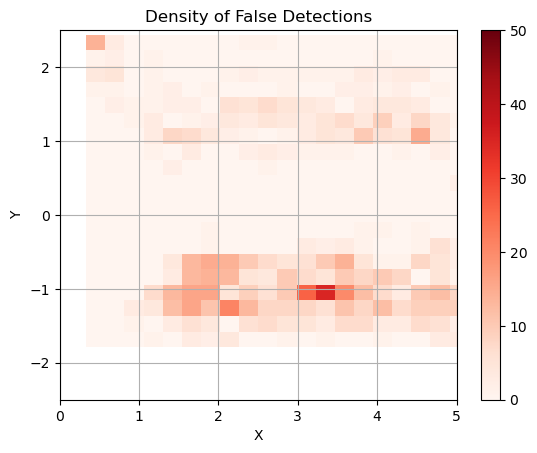

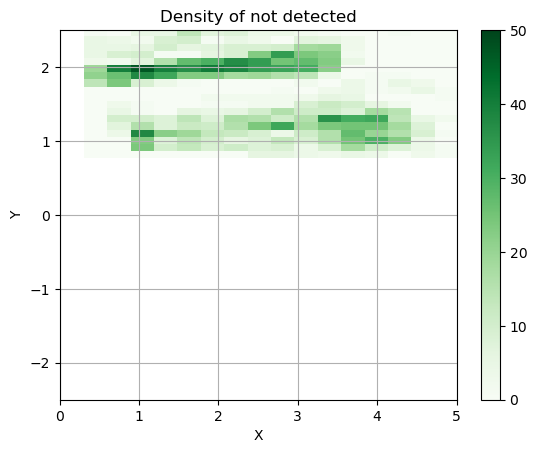

In [9]:
# Extract x and y coordinates of true detections
true_x = [feature.mean_point[0] for feature in alg_true]
true_y = [feature.mean_point[1] for feature in alg_true]

false_x = [feature.mean_point[0] for feature in alg_false]
false_y = [feature.mean_point[1] for feature in alg_false]

not_detected_x = [feature.mean_point[0] for feature in tp_true]
not_detected_y = [feature.mean_point[1] for feature in tp_true]

# Create histogram

plt.figure()
plt.hist2d(true_x, true_y, bins=20, cmap='Blues')
plt.title('Density of Good Detections')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.colorbar()
plt.xlim(0, 5)
plt.ylim(-2.5, 2.5)
plt.clim(0,50)



plt.figure()
plt.title('Density of False Detections')
plt.hist2d(false_x, false_y, bins=20, cmap='Reds')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.colorbar()
plt.xlim(0, 5)
plt.ylim(-2.5, 2.5)
plt.clim(0,50)


plt.figure()
plt.title('Density of not detected')

plt.hist2d(not_detected_x, not_detected_y, bins=20, cmap='Greens')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.colorbar()
plt.xlim(0, 5)
plt.ylim(-2.5, 2.5)
plt.clim(0,50)


# Show the plot
plt.show()


# Statistics

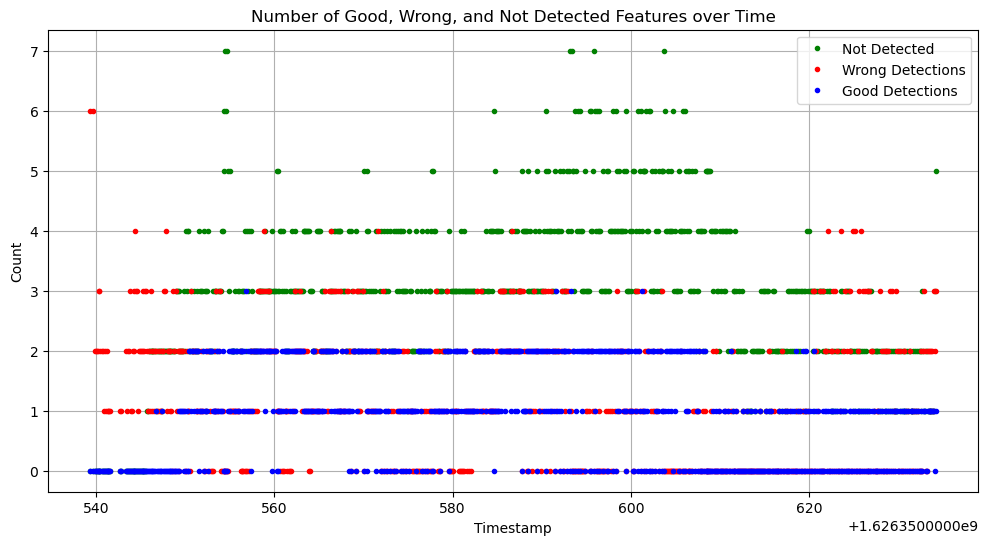

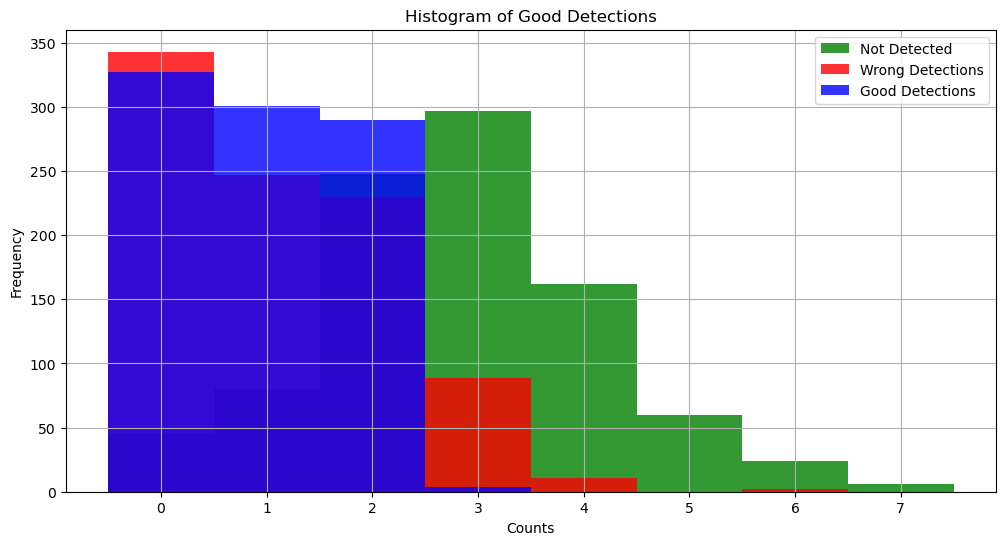

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
from copy import copy


def group_by_timestamp(features, grouped_features):
    timestamp_dict = defaultdict(list)
    for key in grouped_features.keys():
        timestamp_dict[key] = []
    for feature in features:
        timestamp = str(feature.sec) + "_" + str(feature.nanosec)
        timestamp_dict[timestamp].append(feature)
    return timestamp_dict


grouped_features_good_alg = group_by_timestamp(alg_true, grouped_features)
grouped_features_wrong_detect = group_by_timestamp(alg_false, grouped_features)
grouped_features_cannot_detect = group_by_timestamp(tp_true, grouped_features)

all_timestamps = [float(int(key.split("_")[0])) + float(int(key.split("_")[1]))*1e-9 for key in grouped_features.keys()]
good_counts = [len(features) for features in grouped_features_good_alg.values()]
wrong_counts = [len(features) for features in grouped_features_wrong_detect.values()]
not_detected_counts = [len(features) for features in grouped_features_cannot_detect.values()]

ax.plot(all_timestamps, not_detected_counts, '.', label="Not Detected", color="green", linewidth=0.5)
ax.plot(all_timestamps, wrong_counts, '.', label="Wrong Detections", color="red", linewidth=0.5)
ax.plot(all_timestamps, good_counts, '.', label="Good Detections", color="blue", linewidth=0.5)
ax.set_xlabel("Timestamp")
ax.set_ylabel("Count")
ax.legend()
ax.grid(True)
ax.set_title("Number of Good, Wrong, and Not Detected Features over Time")


plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
# Calculate the center of each bin
bin_centers = np.arange(0, max(not_detected_counts)+2) - 0.5

# 
ax.hist(not_detected_counts, bins=bin_centers, color="green", alpha=0.8, label="Not Detected")
ax.hist(wrong_counts, bins=bin_centers, color="red", alpha=0.8, label="Wrong Detections")
ax.hist(good_counts, bins=bin_centers, color="blue", alpha=0.8, label="Good Detections")
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency")
ax.legend()
ax.xticks = bin_centers
ax.grid(True)
ax.set_title("Histogram of Good Detections")
plt.show()